In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from keras.preprocessing import sequence
from keras.models import Sequential 
from keras.layers import Dense,Dropout, Embedding, GlobalMaxPooling1D
from keras.datasets import imdb

max_words = 10000



In [26]:
(X_train,y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)
max_sequence_length = 500
X_train=sequence.pad_sequences(X_train, maxlen=max_sequence_length)
X_test=sequence.pad_sequences(X_test, maxlen=max_sequence_length)

In [27]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_sequence_length))
model.add(GlobalMaxPooling1D())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 global_max_pooling1d_2 (Gl  (None, 100)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 256)               25856     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1026113 (3.91 MB)
Trainable params: 1026113 (3.91 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [29]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4232 - accuracy: 0.7900 - val_loss: 0.2896 - val_accuracy: 0.8775
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2292 - accuracy: 0.9084 - val_loss: 0.2905 - val_accuracy: 0.8782
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1510 - accuracy: 0.9451 - val_loss: 0.3203 - val_accuracy: 0.8719
Epoch 4/10
782/782 [==============================] - 7s 8ms/step - loss: 0.0885 - accuracy: 0.9702 - val_loss: 0.3746 - val_accuracy: 0.8667
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0440 - accuracy: 0.9870 - val_loss: 0.4678 - val_accuracy: 0.8618
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0198 - accuracy: 0.9946 - val_loss: 0.5536 - val_accuracy: 0.8592
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0068 - accuracy: 0.9989 - val_loss: 0.6452 - val_accuracy: 0.8602
Epoch 

782/782 [==============================] - 1s 1ms/step - loss: 0.7911 - accuracy: 0.8626
Loss:  0.7911421060562134
Accuracy:  0.862559974193573
782/782 [==============================] - 1s 1ms/step


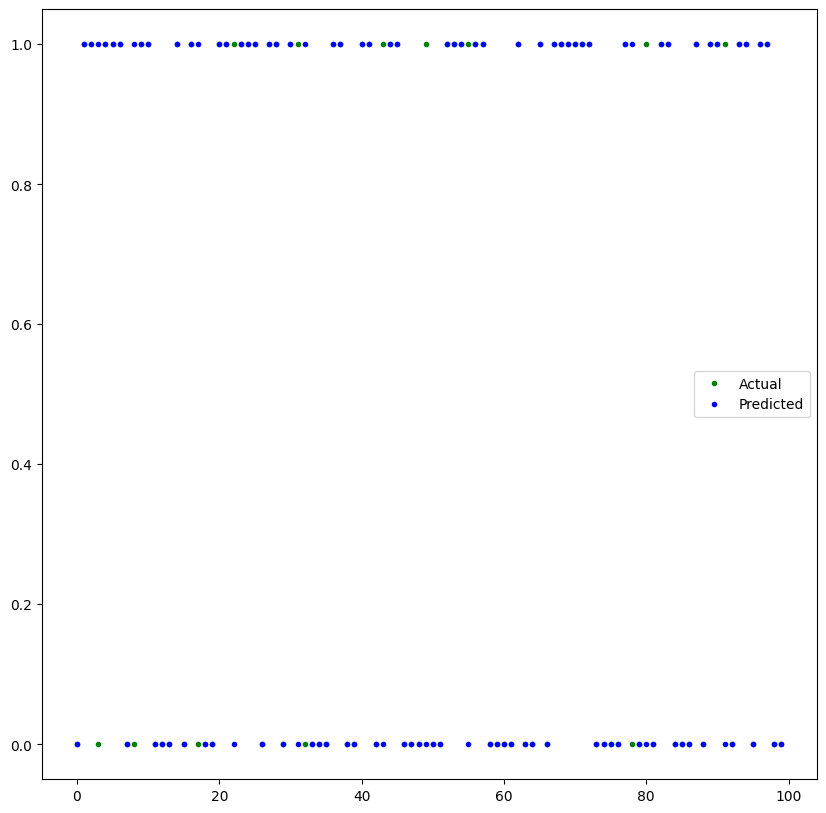

In [30]:
loss,accuracy = model.evaluate(X_test,y_test)
print("Loss: ", loss )
print("Accuracy: ", accuracy )

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

plt.figure(figsize=(10,10))
plt.plot(y_test[:100],'g.',label='Actual')
plt.plot(y_pred[:100],'b.',label='Predicted')
plt.legend()
plt.show()


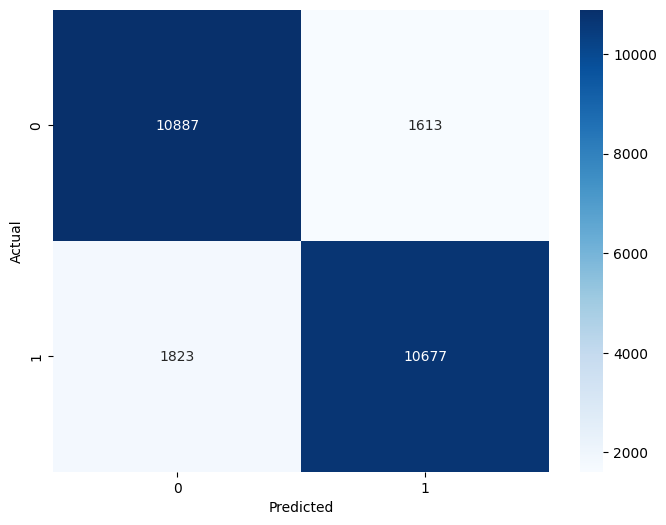

In [31]:
cm = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86     12500
           1       0.87      0.85      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

